In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
from sklearn.preprocessing import binarize

In [238]:
#read data
df = pd.read_csv('/Users/amandakhoo/code/data4all-team6/data/merged_RRI_SRI_data.csv')
df = df[df.notna()]
df.head()
#df.describe()

,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,2018-03-08,3.718594,3.457253,4.562368,0.044862,2.945760,4.199607,3.028331,3.724648,4.429002,...,0.940419,1.093750,0.635217,0.460772,1.056587,0.156348,1.037322,1.469957,1.257610,0.466765
1,2018-03-09,4.522901,3.488016,2.997927,0.044862,2.187291,5.328785,3.858570,3.859563,5.073305,...,1.289443,2.337111,0.554911,0.626054,0.820090,1.126202,0.606894,1.308201,0.732345,0.975567
2,2018-03-10,6.107322,1.234070,3.085771,0.044862,2.719971,5.989625,1.741679,3.162777,4.063662,...,3.112223,3.834196,3.938322,3.936778,1.876850,3.942463,3.082432,2.434927,1.473967,3.281961
3,2018-03-11,3.873077,1.261212,6.840369,0.044862,3.189822,5.489281,1.741679,4.638495,6.471925,...,4.748849,4.101958,4.668180,4.061820,2.394439,4.565925,3.578462,3.591185,3.080530,4.589329
4,2018-03-12,5.228657,3.413127,4.470042,0.044862,3.863130,4.415463,4.612428,4.991392,4.664407,...,1.214632,0.721219,0.674600,0.515856,1.015444,0.551766,1.174367,1.354263,0.579096,0.477413


<AxesSubplot:xlabel='segment_1307_max_SRI', ylabel='segment_873_max_SRI'>

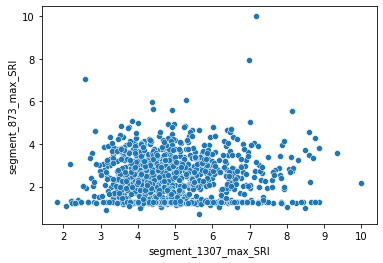

In [41]:
sns.scatterplot(data = df, x = 'segment_1307_max_SRI', y = 'segment_873_max_SRI')

In [42]:
#descriptive statistics on road congestion segments
df.filter(regex=("segment.*")).describe().loc[['mean']].T.sort_values(by = 'mean')
print('largest average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.max()))
print('smallest average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.min()))
print('median average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.median()))


largest average daily SRI across all segments: mean    6.154505
dtype: float64
smallest average daily SRI across all segments: mean    0.033993
dtype: float64
median average daily SRI across all segments: mean    3.136903
dtype: float64


In [43]:
df.filter(regex=("station.*")).describe().loc[['mean']].T.sort_values(by = 'mean')
print('largest average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.max()))
print('smallest average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.min()))
print('median average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.median()))


largest average daily RRI across all segments: mean    2.217636
dtype: float64
smallest average daily RRI across all segments: mean    0.391148
dtype: float64
median average daily RRI across all segments: mean    1.613303
dtype: float64


In [44]:
#binarize into "congested" (0) or "not congested" (0) based on median value of all segment averages SRIs across time period

thresh_sri = df.filter(regex=("segment.*")).describe().loc[['mean']].T.median()[0]
thresh_rri = df.filter(regex=("station.*")).describe().loc[['mean']].T.median()[0]

In [65]:
print(thresh_sri)
print(thresh_rri)

3.136902878892416
1.6133027350605493


In [46]:

sri = df.filter(regex=("segment.*"))
rri = df.filter(regex=("station.*"))

In [81]:
sri_bin = pd.DataFrame(np.where(sri >= thresh_sri, 1,0))
sri_bin.columns = sri.columns
sri_bin.head()

,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,segment_508_max_SRI,...,segment_124_max_SRI,segment_134_max_SRI,segment_771_max_SRI,segment_609_max_SRI,segment_804_max_SRI,segment_814_max_SRI,segment_1218_max_SRI,segment_1208_max_SRI,segment_383_max_SRI,segment_393_max_SRI
0,1,1,1,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,1,1,1
1,1,1,0,0,0,1,1,1,1,0,...,1,0,1,0,1,1,0,1,1,0
2,1,0,0,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,1,1,1
3,1,0,1,0,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,0,1
4,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,1,1,1,0,1


In [82]:
rri_bin = pd.DataFrame(np.where(rri >= thresh_rri, 1, 0))
rri_bin.columns = rri.columns
rri_bin.head()

,station_40050_max_RRI,station_40040_max_RRI,station_40970_max_RRI,station_40960_max_RRI,station_41440_max_RRI,station_41450_max_RRI,station_41330_max_RRI,station_41320_max_RRI,station_40720_max_RRI,station_40730_max_RRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_bin = pd.concat([sri_bin, rri_bin], axis = 1)
df_bin.insert(0, 'date', df['date'])
df_bin.head()

,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,2018-03-08,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-03-09,1,1,0,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,2018-03-10,1,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
3,2018-03-11,1,0,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2018-03-12,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Pearson Correlation Matrix

In [79]:
#df_bin.to_csv('/Users/amandakhoo/code/data4all-team6/data/binarizedthresh_RRI_SRI_data.csv')

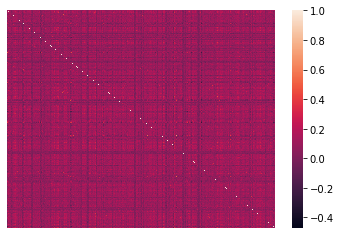

In [50]:
#pearson correlation
sns.heatmap(sri.corr(), yticklabels= False, xticklabels=False)
plt.show()


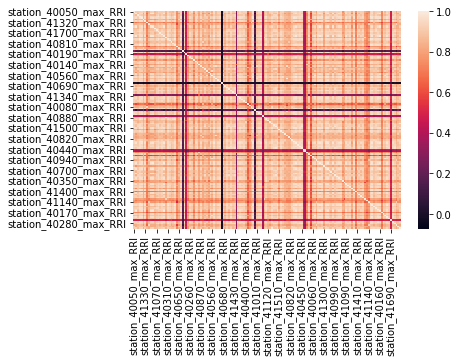

In [51]:
sns.heatmap(rri.corr())
plt.show()


## Chi2 Contingency Test

In [78]:
#chi2
from scipy.stats import chi2_contingency
f = df_bin
x = df_bin.loc[:, df_bin.columns != 'date']
x = pd.crosstab(df_bin.loc[1], df_bin.loc[2]) #grabbed the first two columns just to see
chi2, p, dof, ex=chi2_contingency(x)
ex

array([[2.32534005e+02, 3.54972292e+02, 4.93702771e-01],
       [2.38070529e+02, 3.63424013e+02, 5.05457599e-01],
       [3.95465995e-01, 6.03694374e-01, 8.39630563e-04]])

## Principal Component Analysis

In [290]:
from sklearn.decomposition import PCA
f = df_T.dropna()
x = f.loc[:, f.columns != 'transport_type']
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf['transport_type'] = f.transport_type.values
principalDf

,pc1,pc2,transport_type
0,59.056355,16.433491,road
1,-15.107712,-16.627085,road
2,24.713334,4.028324,road
3,-85.666091,-43.096755,road
4,-5.779367,-8.316863,road
...,...,...,...
1166,-61.640301,36.720538,subway
1167,-64.127689,22.593644,subway
1168,-58.932857,21.531964,subway
1169,-72.650910,5.098330,subway


In [255]:
[index for index, row in x.iterrows() if row.isnull().any()]

['segment_994_max_SRI',
 'segment_674_max_SRI',
 'segment_680_max_SRI',
 'segment_1011_max_SRI',
 'segment_1063_max_SRI',
 'segment_370_max_SRI',
 'segment_847_max_SRI',
 'segment_1050_max_SRI',
 'segment_830_max_SRI',
 'segment_328_max_SRI',
 'segment_1083_max_SRI',
 'segment_329_max_SRI',
 'segment_831_max_SRI',
 'segment_330_max_SRI',
 'segment_848_max_SRI',
 'segment_1091_max_SRI',
 'segment_673_max_SRI',
 'segment_832_max_SRI',
 'station_40200_max_RRI']

In [270]:
f

date,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,...,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,transport_type
segment_1307_max_SRI,3.718594,4.522901,6.107322,3.873077,5.228657,3.984405,5.725434,4.139012,4.723373,4.25032,...,2.526955,3.838945,6.363693,2.166459,4.258234,6.571222,5.000275,5.120739,3.481981,road
segment_873_max_SRI,3.457253,3.488016,1.23407,1.261212,3.413127,3.339473,3.575611,2.579178,1.889546,2.151411,...,2.008861,1.964313,1.445855,3.067277,2.068701,1.297487,1.261212,1.320598,1.715255,road
segment_863_max_SRI,4.562368,2.997927,3.085771,6.840369,4.470042,3.895576,2.999246,4.325552,5.123345,1.522649,...,3.431631,3.350316,3.753374,1.709012,3.244413,2.453811,3.075822,1.998474,1.774546,road
segment_1061_max_SRI,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,...,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,road
segment_235_max_SRI,2.94576,2.187291,2.719971,3.189822,3.86313,3.041684,2.499032,3.195773,2.260985,3.050464,...,3.793119,2.179415,3.000081,3.243831,2.701035,2.155135,3.470551,2.687221,2.720894,road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
station_41680_max_RRI,0.156348,1.126202,3.942463,4.565925,0.551766,1.42361,1.937861,1.543132,1.84017,-1.670512,...,3.640137,3.806244,3.481017,3.178878,2.47595,-1.56352,-1.950311,3.064025,3.433828,subway
station_40280_max_RRI,1.037322,0.606894,3.082432,3.578462,1.174367,1.673335,-0.007252,0.21597,1.033467,2.890342,...,1.936105,2.392681,2.54159,2.983398,2.654976,-0.705062,-1.478154,2.124222,3.084207,subway
station_40290_max_RRI,1.469957,1.308201,2.434927,3.591185,1.354263,1.014854,1.255127,1.088749,1.849516,1.436162,...,2.501699,2.709323,2.091879,2.968105,2.472791,0.014256,-1.149137,2.288223,2.688357,subway
station_41200_max_RRI,1.25761,0.732345,1.473967,3.08053,0.579096,0.784317,0.911403,0.560095,0.147856,-0.568258,...,1.496472,1.786076,1.917807,2.141696,1.9888,-0.482327,-1.138623,1.411314,1.86504,subway


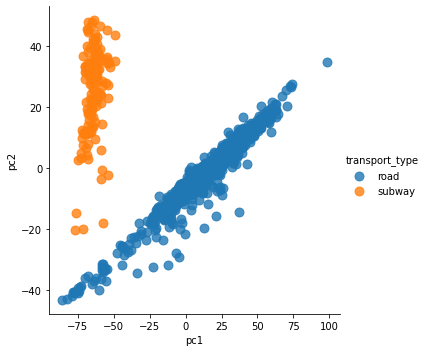

In [292]:
sns.lmplot( x="pc1", y="pc2",
  data=principalDf, 
  fit_reg=False,
  legend=True,
           hue = 'transport_type',
  scatter_kws={"s": 80})

In [64]:
pca.explained_variance_ratio_ #2 components only less than 20% of data variance is described

array([0.13307793, 0.05203583])

## K-means Clustering

In [239]:
#add column to differentiate between road segments and stations
df_T = df.T
df_T = df_T[df_T.notna()]
#df_T.reset_index(inplace=True)
df_T['transport_type'] = None

In [240]:
df_T['transport_type'].loc[df_T.index.str.contains('segment', 'transport_type')] = 'road'
df_T['transport_type'].loc[df_T.index.str.contains('station', 'transport_type')] = 'subway'
df_T['transport_type'].loc[df_T.index.str.contains('date', 'transport_type')] = 'transport_type'


In [241]:
df_T.columns = df_T.loc['date']
df_T.drop('date', inplace = True)

In [242]:
df_T.T

,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,segment_508_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
date,,,,,,,,,,,,,,,,,,,,,
2018-03-08,3.718594,3.457253,4.562368,0.044862,2.94576,4.199607,3.028331,3.724648,4.429002,2.60257,...,0.940419,1.09375,0.635217,0.460772,1.056587,0.156348,1.037322,1.469957,1.25761,0.466765
2018-03-09,4.522901,3.488016,2.997927,0.044862,2.187291,5.328785,3.85857,3.859563,5.073305,1.893133,...,1.289443,2.337111,0.554911,0.626054,0.82009,1.126202,0.606894,1.308201,0.732345,0.975567
2018-03-10,6.107322,1.23407,3.085771,0.044862,2.719971,5.989625,1.741679,3.162777,4.063662,3.057052,...,3.112223,3.834196,3.938322,3.936778,1.87685,3.942463,3.082432,2.434927,1.473967,3.281961
2018-03-11,3.873077,1.261212,6.840369,0.044862,3.189822,5.489281,1.741679,4.638495,6.471925,4.851338,...,4.748849,4.101958,4.66818,4.06182,2.394439,4.565925,3.578462,3.591185,3.08053,4.589329
2018-03-12,5.228657,3.413127,4.470042,0.044862,3.86313,4.415463,4.612428,4.991392,4.664407,2.577283,...,1.214632,0.721219,0.6746,0.515856,1.015444,0.551766,1.174367,1.354263,0.579096,0.477413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27,6.571222,1.297487,2.453811,0.044862,2.155135,4.226209,1.741679,2.919185,4.413877,2.378971,...,-1.256395,-0.846204,-1.711895,-0.298688,0.278178,-1.56352,-0.705062,0.014256,-0.482327,-1.675538
2021-02-28,5.000275,1.261212,3.075822,0.044862,3.470551,3.985033,1.748345,2.094229,5.568938,2.338675,...,-2.346263,-1.491179,-2.599722,-0.740329,-0.374611,-1.950311,-1.478154,-1.149137,-1.138623,-1.949744
2021-03-01,5.120739,1.320598,1.998474,0.044862,2.687221,3.544707,1.741679,5.393069,4.176739,2.499624,...,3.29277,3.050904,2.880534,1.707844,1.898254,3.064025,2.124222,2.288223,1.411314,2.694003
